# Group information

Names:
*   Gabriel Cunha Marchetti
*   Felipe Scalabrin Dosso

RAs:
*   251055
*   236110



# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Seoul Bike Sharing Demand**

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather and date information.

In order to have a good quality of service, the company needs to understand how to distribute and maintain the bicycles available (or even buy more bikes).<br/>
This dataset was collected with the objective to understand which wheater and holiday information impact the number of bikes rented in this system.


Features and the corresponding descriptions:
- **Date** : Date of the sample (year-month-day)
- **Rented Bike count (TARGET)**: Count of bikes rented at this specific hour
- **Hour**: Hour of he day
- **Temperature**:Temperature (in Celsius)
- **Humidity**: Air humidity level (in %)
- **Windspeed**: Average windspeed during this hour (in m/s)
- **Visibility**: Average visibility level during this hour (in 10m)
- **Dew point temperature**: Average temperature where steam condeses into water during this hour (in Celsius)
- **Solar radiation**: Average level of radiation emitted by the sun during this hour (in MJ/m²)
- **Rainfall**: Average rainfall during this hour (in mm)
- **Snowfall**: Average snowfall during this hour (in cm)
- **Seasons**: Season of this date, it can be: Winter, Spring, Summer or Autumn
- **Holiday**: Describes if this date is a Holiday or not (Holiday/No holiday)
- **Functional Day**: Wheter this was a functional day or not (0 = Non Functional Hours, 1 = Functional hours)


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)
print(df)

            Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                256     0            -5.2           37   
1     01/12/2017                206     1            -5.5           38   
2     01/12/2017                175     2            -6.0           39   
3     01/12/2017                109     3            -6.2           40   
4     01/12/2017                 80     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1005    19             4.2           34   
8756  30/11/2018                766    20             3.4           37   
8757  30/11/2018                696    21             2.6           39   
8758  30/11/2018                714    22             2.1           41   
8759  30/11/2018                586    23             1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0                  2.2              2000 

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Rented Bike count`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it (more details on the `mutual_information` section below!).

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


# Préprocessamento de dados


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Separação da coluna data em Ano, mês e dia

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

## Divisão dos dados em teste e treino

In [ ]:
Y = df["Rented Bike Count"]

# Tiramos a feature "Data" do dataset, porque ela não será usada na regressão
X = df[["Hour", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)",
        "Visibility (10m)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)",
        "Rainfall(mm)", "Snowfall (cm)", "Seasons", "Functioning Day", "Holiday"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6132, 12) (2628, 12) (6132,) (2628,)


## Colocar os dados numa escala [-1, 1]
Apenas os dados contínuos devem ser transformados assim.

In [ ]:
# Função que coloca os dados nesse intervalo
def transforma_col(a):
    return (a - np.mean(a, axis=0)) / np.max(a, axis=0)

Y_train = transforma_col(Y_train)
Y_test = transforma_col(Y_test)

In [ ]:
numeric_cols = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in numeric_cols:
    X_train[col] = transforma_col(X_train[col])
    X_test[col] = transforma_col(X_test[col])

print(X_train)

      Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
2863     7       -0.064737     0.122902         -0.087939         -0.480659   
6985     1        0.158613     0.133106         -0.182534          0.233841   
3060    12       -0.178950    -0.356690          0.330980          0.272841   
7767    15        0.209375    -0.346486         -0.033885          0.193841   
5909     5        0.409882     0.041269          0.047196          0.195341   
...    ...             ...          ...               ...               ...   
4829     5        0.153537     0.255555          0.033682         -0.493659   
7291    19        0.102776    -0.234241          0.155304          0.277841   
1344     0       -0.714483    -0.244445         -0.006858          0.277841   
7293    21        0.054552    -0.183221          0.168818          0.277841   
1289    17       -0.600270    -0.203629          0.236385          0.277841   

      Dew point temperature(C)  Solar Radiation (MJ

# Visualização dos dados
Gráfico de dispersão entre features e target.

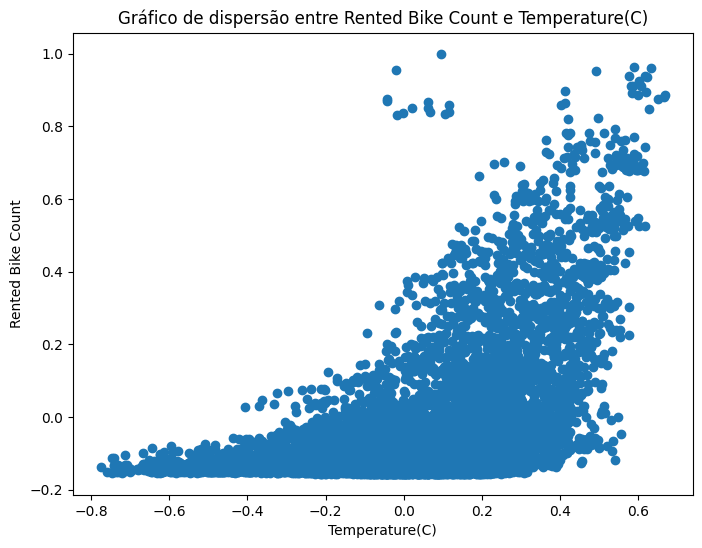

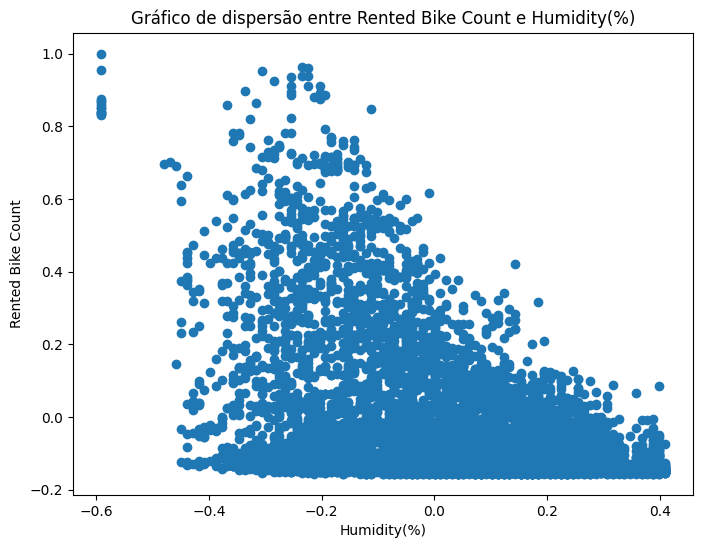

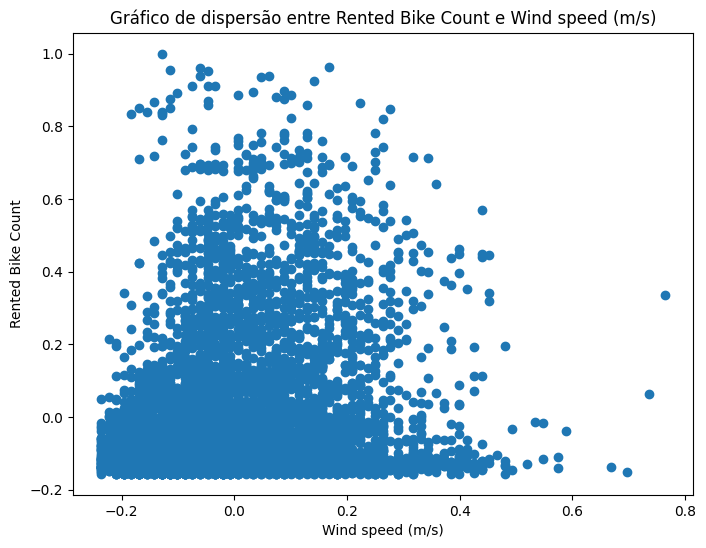

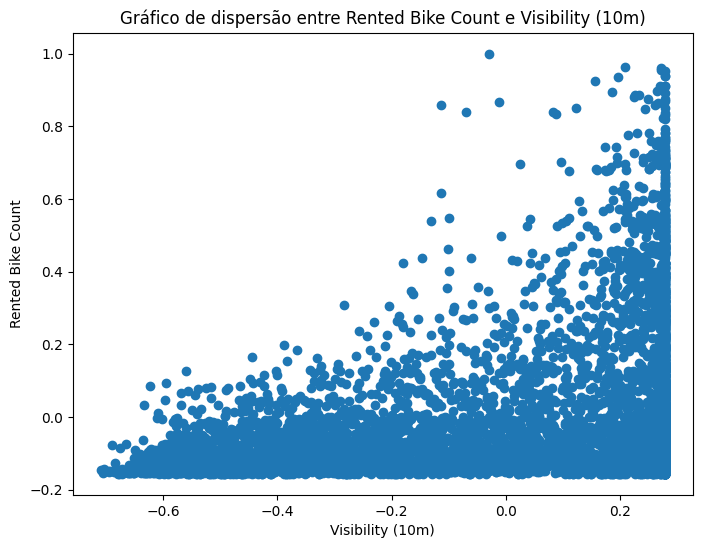

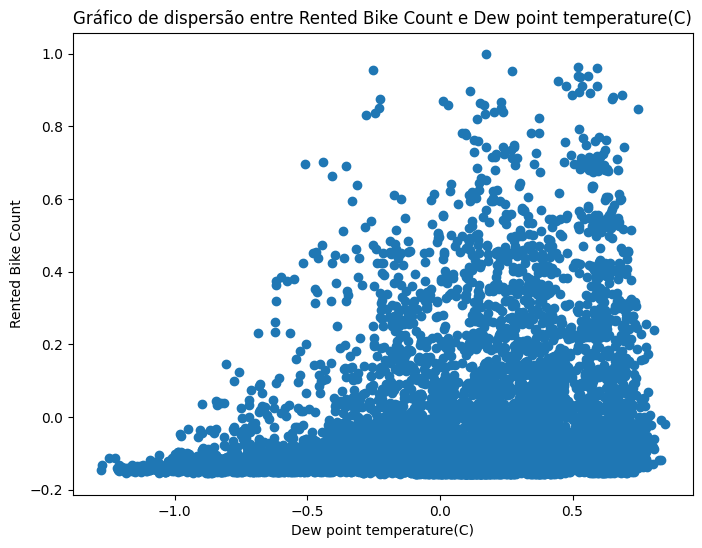

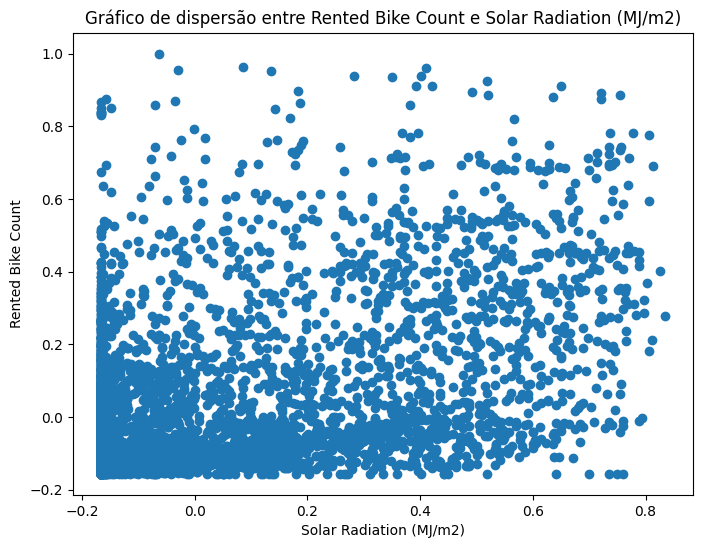

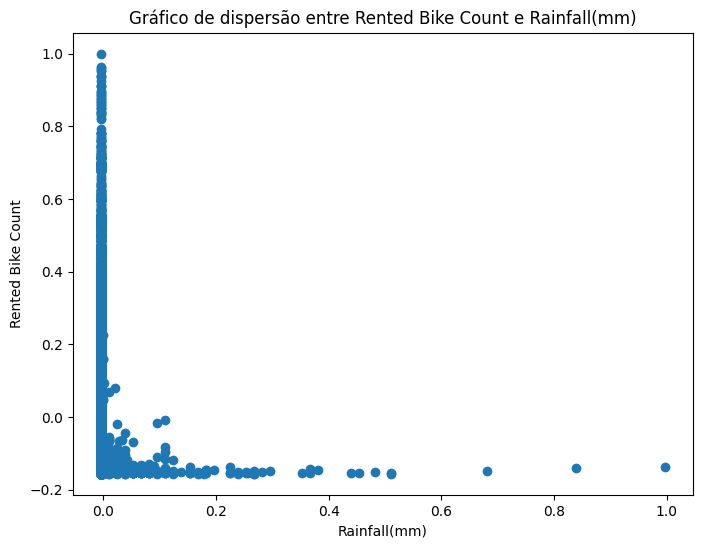

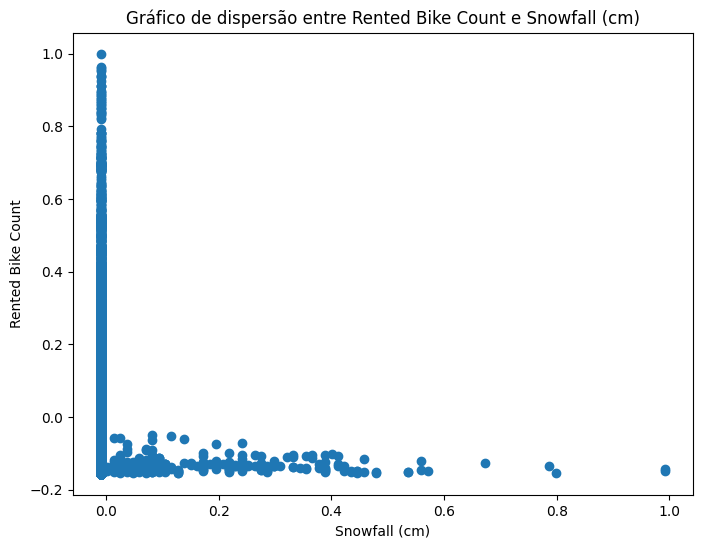

In [ ]:
## Visualize the data

## Gráfico de dispersão
for col in numeric_cols:
    eixo_y = Y_train
    eixo_x = X_train[col]
    plt.figure(figsize=(8, 6))
    plt.scatter(eixo_x, eixo_y)
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")
    plt.title("Gráfico de dispersão entre Rented Bike Count e " + col)
    plt.show()

Boxplot das features e de target

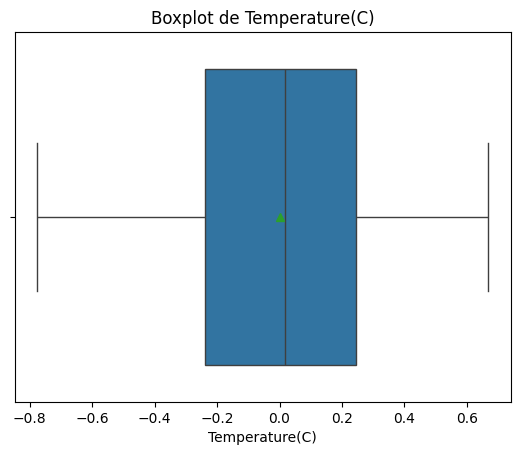

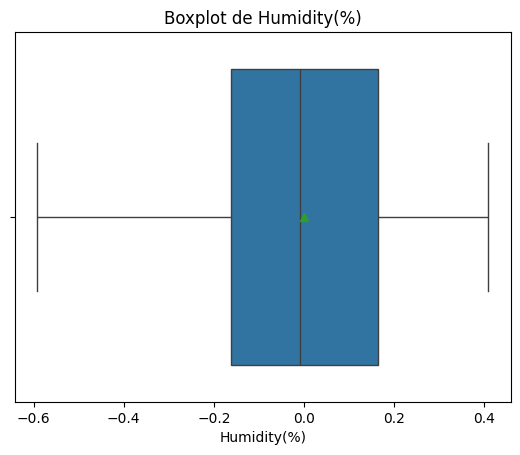

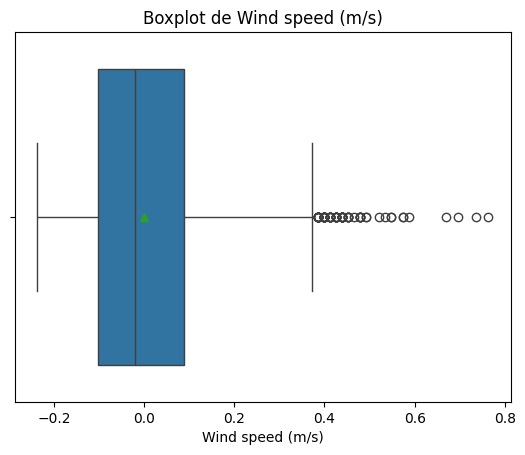

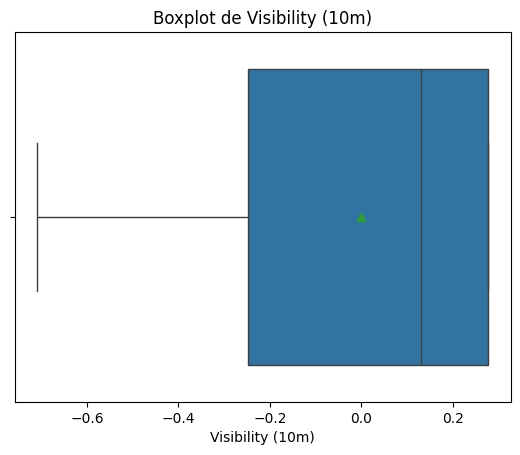

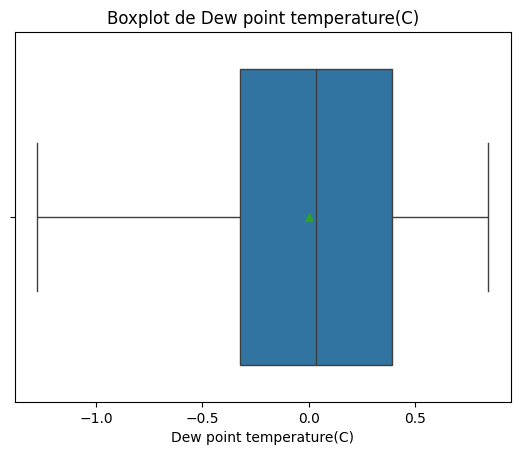

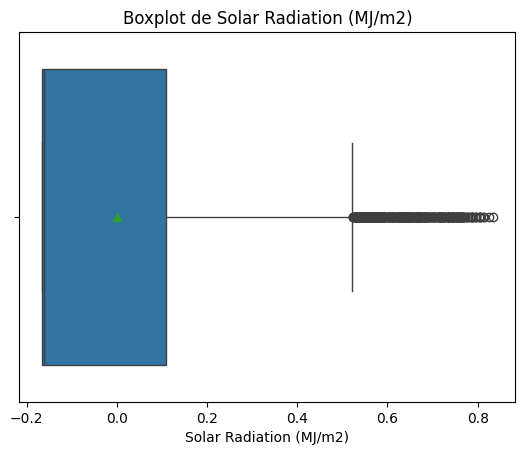

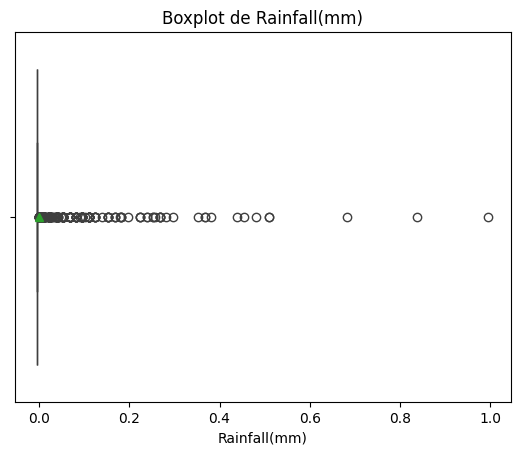

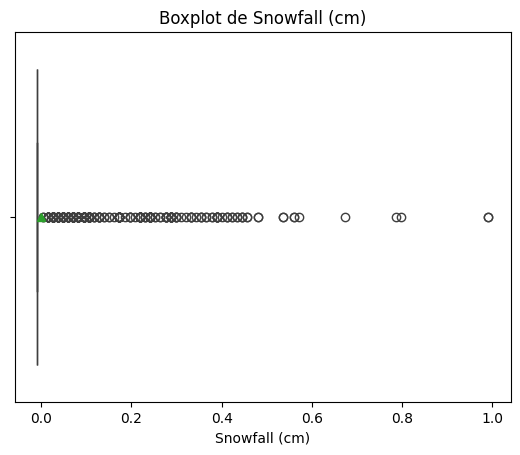

In [ ]:
## Boxplot das variáveis
import seaborn as sns

for col in numeric_cols:
    sns.boxplot(x = col, showmeans=True, data = X_train)
    plt.title("Boxplot de " + col)
    plt.xlabel(col)
    plt.show()

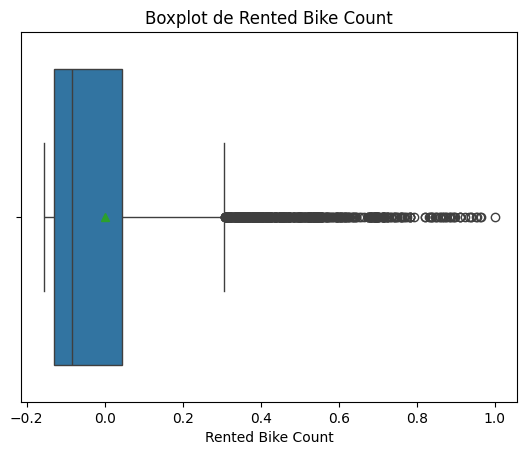

In [ ]:
seila = pd.DataFrame({"Rented Bike Count": Y_train})

sns.boxplot(x = "Rented Bike Count", showmeans=True, data = seila)
plt.title("Boxplot de Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.show()

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


## Tratamento das variáveis categóricas e discretas

In [ ]:
## check Mutal information
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## Usando OneHotEncoder


In [ ]:
## Adaptação da feature "Seasons" - treino
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

encoder_seasons = encoder.fit_transform(X_train[["Seasons"]] )
X_train = pd.concat( [X_train, encoder_seasons], axis=1 ).drop( columns=["Seasons"] )


## Adaptação da feature "Seasons" - teste
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

encoder_seasons = encoder.fit_transform(X_test[["Seasons"]])
X_test = pd.concat( [X_test, encoder_seasons], axis=1 ).drop( columns=["Seasons"] )



## Adaptação da feature "Holiday" treino e teste
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encoder_holiday = encoder.fit_transform(X_train[["Holiday"]] )
X_train = pd.concat( [X_train, encoder_holiday], axis=1 ).drop( columns=["Holiday"] )

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encoder_holiday = encoder.fit_transform(X_test[["Holiday"]])
X_test = pd.concat( [X_test, encoder_holiday], axis=1 ).drop( columns=["Holiday"] )

## Usando OrdinalEncoder

In [ ]:
## Functioning Day, Hour, Year, Month e Day - treino
encoder = OrdinalEncoder(categories = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])
X_train.iloc[:, 3] = encoder.fit_transform(X_train.iloc[:, 3].values.reshape(-1, 1)) # Hour


encoder = OrdinalEncoder(categories = [[0, 1]])
X_train.iloc[:, 12] = encoder.fit_transform(X_train.iloc[:, 12].values.reshape(-1, 1)) # Functioning Day


encoder = OrdinalEncoder(categories = [[2017, 2018]])
X_train["Year"] = encoder.fit_transform(X_train["Year"].values.reshape(-1, 1)) # Year


encoder = OrdinalEncoder(categories = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])
X_train["Month"] = encoder.fit_transform(X_train["Month"].values.reshape(-1, 1)) #Month


encoder = OrdinalEncoder(categories = [[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                                        12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                        22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])
X_train["Day"] = encoder.fit_transform(X_train["Day"].values.reshape(-1, 1))  # Day



## Functioning Day, Hour, Year, Month e Day - teste
encoder = OrdinalEncoder(categories = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])
X_test.iloc[:, 3] = encoder.fit_transform(X_test.iloc[:, 3].values.reshape(-1, 1)) # Hour


encoder = OrdinalEncoder(categories = [[0, 1]])
X_test.iloc[:, 12] = encoder.fit_transform(X_test.iloc[:, 12].values.reshape(-1, 1)) # Functioning Day


encoder = OrdinalEncoder(categories = [[2017, 2018]])
X_test["Year"] = encoder.fit_transform(X_test["Year"].values.reshape(-1, 1)) # Year


encoder = OrdinalEncoder(categories = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])
X_test["Month"] = encoder.fit_transform(X_test["Month"].values.reshape(-1, 1)) #Month


encoder = OrdinalEncoder(categories = [[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                                        12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                        22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])
X_test["Day"] = encoder.fit_transform(X_test["Day"].values.reshape(-1, 1))  # Day

## Gráfico de mutual information

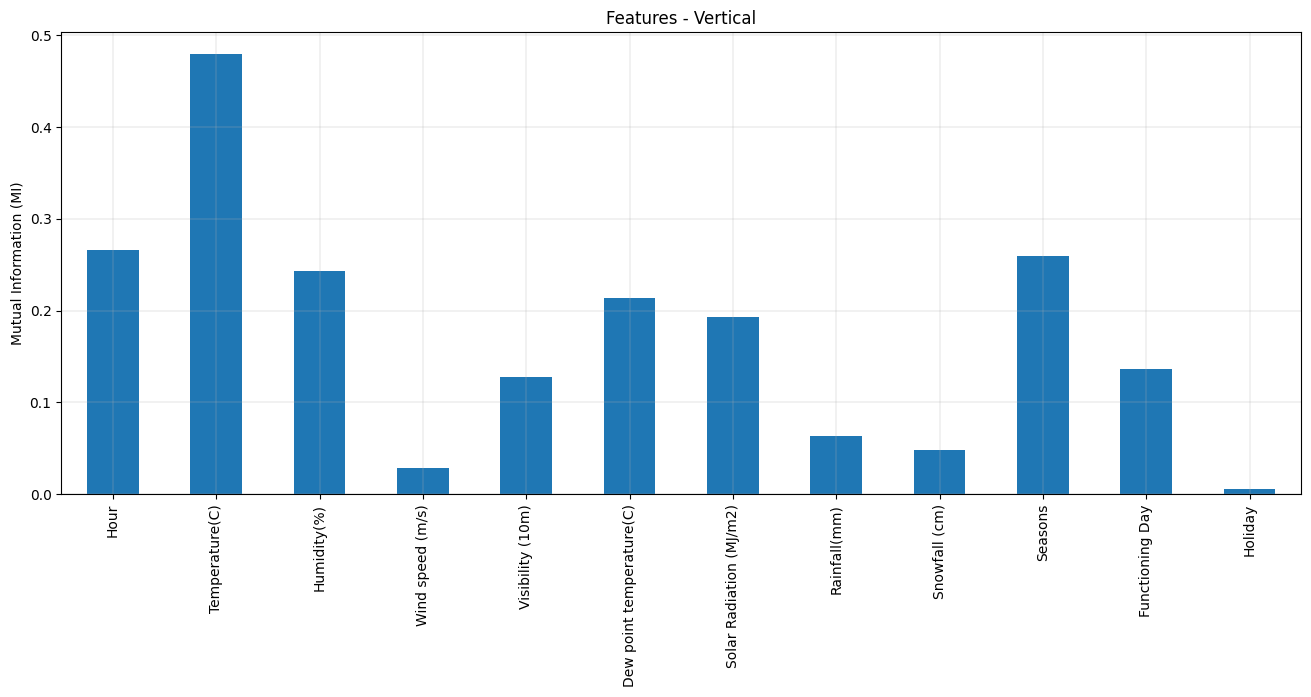

In [ ]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function
var_discretas = [True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True]
mt_info = mutual_info_regression(X_train, Y_train, discrete_features = var_discretas)
mt_info_df = pd.Series(mt_info)
mt_info_df.index = X_train.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

#### Discussion of key points

- How the visualization helped in understanding the data?
- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)


*YOUR ANSWER HERE*

A visualização dos dados em gráfico de dispersão ajudou a ter uma noção melhor da relação entre as features e a variável resposta e os gráficos de boxplot mostraram os valores outliers em todas as variáveis (features e resposta). Pelo gráfico de dispersão, foi possível perceber que Rainfall e Snowfall ingluenciam muito pouco em Y.

Além disso, o gráfico de mutual information mostra que, não só Rainfall e Snowfall não influenciam em Y, como Holiday e Windspeed contribuem pouco para a variação de Y. Além disso, como têm muitas variáveis no modelo, vamos definir um mínimo de 0.2 de mutual information (features com mutual information muito perto desse valor serão adicionadas também). Portanto, as variáveis que continuarão no modelo são 'Month', "Hour", "Temperature (C)", "Humidity(%)", 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', "Seasons_Winter".

### **Implement and train a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` metric started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand regression model's perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of the last two metrics (MAE and R²) or use it from sklearn. Compare the three different metrics.

## Função Mean Squared Error (MSE)

In [ ]:
# TODO: MSE. You cannot use machine learning libraries for this!!
def MSE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    erro_total = (y_true - y_pred) ** 2
    return np.mean(erro_total)

## Implementação da classe para fazer regressão

In [ ]:
# TODO: Finish the implementation of MyLinearRegressor. You cannot use machine learning libraries for this!!
class MyLinearRegressor():
    def __init__(self, learning_rate = -1, max_iter = -1):
        self.max_iter         = max_iter
        self.learning_rate    = learning_rate
        self.weights          = None
        self.bias             = None
        self.losses           = []

    def fit(self, X, y):
        # Inicializamos os weights e bias como zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.max_iter):
            # Valores preditos
            y_pred = np.dot(X, self.weights) + self.bias

            #Calculas os  valores da função loss e armazena numa lista
            self.losses.append(np.mean((y_pred - y) ** 2))

            # Calcula os gradientes
            dw = (2 / X.shape[0]) * np.dot(X.T, (y_pred - y)) # Gradiente para weights
            db = (2 / X.shape[0]) * np.sum(y_pred - y) # Gradiente para bias

            # Atualiza o valor dos parâmetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Ajusta o modelo conforme a classe acima e calcula as métricas de acurácia:
Pela análise do gráfico de Mutual Information, mantivemos apenas as colunas 'Month', "Hour", "Temperature (C)", "Humidity(%)", 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', "Seasons_Winter".

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

## Aplicação do modelo
X_train1 = X_train[['Month', "Hour", "Temperature (C)", "Humidity(%)", 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', "Seasons_Winter"]]

X_test1 = X_test[['Month', "Hour", "Temperature (C)", "Humidity(%)", 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', "Seasons_Winter"]]

modelo1 = MyLinearRegressor(learning_rate=0.001, max_iter= 1000)
modelo1.fit(X_train1, Y_train)

y_pred1 = modelo1.predict(X_test1)

mse1 = MSE(Y_test, y_pred1)
mae1 = mean_absolute_error(Y_test, y_pred1)
r_squared1 = r2_score(Y_test, y_pred1)



print("MSE: ", mse1, " MAE: ", mae1, " R quadrado: ", r_squared1)

#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?

*YOUR ANSWER HERE*

A melhor métrica de acurácia nesse caso é o R^2, porque ele representa justamente o que estamos procurando: o quanto as features do modelo capturam a variação de Y divido pela variação total de Y. Se nós mudarmos os hiper parâmetros do modelo (learning rate e max iter), a mudança do MAE e MSE é quase imperceptível, mas dá pra ver que o R^2 muda. Portanto, podemos dizer que, para esse tipo de modelo, a métrica R^2 é a melhor.

Ao analisar o R^2, vemos que o modelo não se ajustou bem, já que a estimativa do Y contribui para apenas 30% da variação de Rented Bike Counts. Podemos dizer que o maior tipo de erro é a variância, pois, segundo os gráficos de dispersão entre Target e cada Feature, a variância de Y parece ser muito grande.

### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [ ]:
# TODO: Traing the SGDRegressor. You should use sklearn libraries.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
reg = make_pipeline(StandardScaler(),
                 linear_model.SGDRegressor(max_iter=1000, tol=1e-3))

reg.fit(X_train, Y_train)

y_pred_2 = reg.predict(X_test)

print("MSE: ", mean_squared_error(Y_test, y_pred_2), "\n",
      "MAE: ", mean_absolute_error(Y_test, y_pred_2), "\n",
      "R quadrado: ", r2_score(Y_test, y_pred_2))

Assim como foi discutido acima, ao mudar o modelo (nesse caso, otimizar), a variação de MSE e MAE são pouco perceptíveis, mas o R^2 aumenta muito. Portanto, o modelo ajustado pelo Sklearn é muito melhor, porque ele explica 60% da variação de Y.

### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



## Leitura e pré processamento dos dados

In [ ]:
# Reload the dataset
path = "gdrive/MyDrive/Unicamp/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
dados = pd.read_csv(path)
dados = dados[["Date", "Hour", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)",
        "Visibility (10m)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)",
        "Rainfall(mm)", "Snowfall (cm)", "Seasons", "Functioning Day", "Holiday", "Rented Bike Count"]]

dados["Date"] = pd.to_datetime(dados["Date"], format='%d/%m/%Y')
dados["Year"] = dados["Date"].dt.year
dados["Month"] = dados["Date"].dt.month
dados["Day"] = dados["Date"].dt.day

X_ = dados[["Year", "Month", "Day", "Hour", "Temperature(C)", "Humidity(%)", "Wind speed (m/s)",
        "Visibility (10m)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)",
        "Rainfall(mm)", "Snowfall (cm)", "Seasons", "Functioning Day", "Holiday"]]
Y_inter = dados["Rented Bike Count"]

## Adaptação das features

In [ ]:
Y_inter = transforma_col(Y_inter)

numeric_cols = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

for col in numeric_cols:
    X_[col] = transforma_col(X_[col])

In [ ]:
## Adaptação da feature "Seasons"
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

encoder_seasons = encoder.fit_transform(X_[["Seasons"]] )
X_ = pd.concat( [X_, encoder_seasons], axis=1 ).drop( columns=["Seasons"] )

## Adaptação da feature "Holiday"
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encoder_holiday = encoder.fit_transform(X_[["Holiday"]] )
X_ = pd.concat( [X_, encoder_holiday], axis=1 ).drop( columns=["Holiday"] )



## Functioning Day, Hour, Year, Month e Day
encoder = OrdinalEncoder(categories = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])
X_["Hour"] = encoder.fit_transform(X_["Hour"].values.reshape(-1, 1)) # Hour


encoder = OrdinalEncoder(categories = [[0, 1]])
X_["Functioning Day"] = encoder.fit_transform(X_["Functioning Day"].values.reshape(-1, 1)) # Functioning Day


encoder = OrdinalEncoder(categories = [[2017, 2018]])
X_["Year"] = encoder.fit_transform(X_["Year"].values.reshape(-1, 1)) # Year


encoder = OrdinalEncoder(categories = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]])
X_["Month"] = encoder.fit_transform(X_["Month"].values.reshape(-1, 1)) #Month


encoder = OrdinalEncoder(categories = [[1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
                                        12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                        22, 23, 24, 25, 26, 27, 28, 29, 30, 31]])
X_["Day"] = encoder.fit_transform(X_["Day"].values.reshape(-1, 1))  # Day

## Interação entre colunas


In [ ]:
# Interação entre colunas
from itertools import product
column_pairs = list(product(X_.columns, repeat=2))

products = {}
discr = [True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True] # Colunas iniciais
discretos = ["Year", "Hour", "Month", "Day", "Seasons_Autumn", "Seasons_Spring", "Seasons_Summer", "Seasons_Winter", "Holiday_Holiday", "Holiday_No Holiday", "Functioning Day"]

for pair in column_pairs:
    name = pair[0] + "_" + pair[1]
    name2 = pair[1] + "_" + pair[0]
    if name in products or name2 in products: # Não repete as interações
        continue

    if (pair[0][:7] == "Seasons" and pair[1][:7] == "Seasons"): #Tira as interações entre as estações
        continue

    if (pair[0][:7] == "Holiday" and pair[1][:7] == "Holiday"): # Tira interações entre "Holiday"
        continue


    products[name] = X_[pair[0]] * X_[pair[1]]


    if (pair[0] in discretos) and (pair[1] in discretos): # Se ambos forem discretos, a interação é discreta
        discr.append(True)
    else:                                                # Caso contrário, é contínuo
        discr.append(False)




products_df = pd.DataFrame(products)

X_ = pd.concat([X_, products_df], axis = 1)

In [ ]:
# Separação em treino e teste
X_inter_train, X_inter_test, y_inter_train, y_inter_test = train_test_split(X_, Y_inter, test_size=0.3, random_state=10)

# Checagem de mutual information

In [ ]:
# Check mutual information
mt_info = mutual_info_regression(X_inter_train, y_inter_train, discrete_features = discr)
mt_info_df = pd.Series(mt_info, index=X_inter_train.columns)
mt_info_df_sorted = mt_info_df.sort_values(ascending=False)
mt_info_df_sorted.plot.bar(figsize=(16, 6))
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

In [ ]:
#As 10 features com mais mutual information
top_10_features = mt_info_df.nlargest(10)
print(top_10_features)

##Features com mais MI
Temperature(C)_Functioning Day

Month_Hour

Temperature(C)_Rainfall(mm)

Hour_Temperature(C)

Temperature(C)_Snowfall (cm)

Temperature(C)

Year_Temperature(C)

Temperature(C)_Holiday_No Holiday

Month_Rainfall(mm)

Month_Temperature(C)

In [ ]:
# Re-train and test the model
X_inter_train = X_inter_train[["Temperature(C)_Functioning Day",
"Month_Hour", "Temperature(C)_Rainfall(mm)", "Hour_Temperature(C)",
"Temperature(C)_Snowfall (cm)", "Temperature(C)" ,"Year_Temperature(C)",
"Temperature(C)_Holiday_No Holiday", "Month_Rainfall(mm)", "Month_Temperature(C)",

"Year", 'Month', "Hour", "Humidity(%)", 'Dew point temperature(C)', "Rainfall(mm)", "Snowfall (cm)"
                               'Solar Radiation (MJ/m2)', "Functioning Day", "Holiday_No Holiday"]]

X_inter_test = X_inter_test[["Temperature(C)_Functioning Day",
"Month_Hour", "Temperature(C)_Rainfall(mm)", "Hour_Temperature(C)",
"Temperature(C)_Snowfall (cm)", "Temperature(C)" ,"Year_Temperature(C)",
"Temperature(C)_Holiday_No Holiday", "Month_Rainfall(mm)", "Month_Temperature(C)",

"Year", 'Month', "Hour", "Humidity(%)", 'Dew point temperature(C)', "Rainfall(mm)", "Snowfall (cm)"
                               'Solar Radiation (MJ/m2)', "Functioning Day", "Holiday_No Holiday"]]

modelo_inter = MyLinearRegressor(learning_rate=0.001, max_iter= 1000)
modelo_inter.fit(X_inter_train, y_inter_train)

y_pred_inter = modelo_inter.predict(X_inter_test)

mse = MSE(y_inter_test, y_pred_inter)
mae_inter = MAE(y_inter_test, y_pred_inter)
r_quadrado_inter = r2_score(y_inter_test, y_pred_inter)

nas = y_inter_train[y_inter_train.isna()]

print("MSE: ", mse, " MAE: ", mae_inter, " R_quadrado: ", r_quadrado)

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: In-vehicle coupon recommendation**

This dataset was built using Amazon Mechanical Turk, which is a tool to apply surveys to a specific range of users.

The applied survey was made by asking user for demographic informations, and then presenting 20 driving scenarios and possible coupon offers.
<br/>
The users had to answer if they would want the coupon or not.

The focus of this dataset was to understand how to correct apply advertsiment of in-vehicle coupons.

Features and the corresponding descriptions:
- **destination**: Destination of the driving scenario. Options: No Urgent Place, Home, Work
- **passanger**: People in the car of the driving scenario. Options: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Weather of the driving scenario. Options: Sunny, Rainy, Snowy
- **temperature**: Temperature of the driving scenario. Options: 55, 80, 30
- **time**: Hour of the driving scenario. Options: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Type of coupon offered. Options:
  - Restaurant(< \\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration**: Expiration of the coupon in the scenario. Options: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Gender of the person answering the survey. Options: Female, Male
- **age**: Age of the person answering the survey. Options: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Marital status of the person answering the survey. Options: Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children**: If the person answering the survey has children. Options:1, 0
- **education**: Edducation level of the person answering the survey. Options: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **ocupation**: Ocupation of the person answering the survey. Options:
  - Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income**: Anual income of the person answering the survey. Options:
  - \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Bar**: Question: how many times do you go to a bar every month? Options: never, less1, 1\~3, 4\~8, gt8, nan
- **CoffeeHouse**: Question: how many times do you go to a coffeehouse every month? never, less1, 4\~8, 1\~3, gt8,  nan
- **CarryAway**: Question: how many times do you get take-away food every month? Options: n4\~8, 1\~3, gt8, less1, never
- **RestaurantLessThan20**: Question: how many times do you go to a restaurant with an average expense per person of less than $20 every month? Options: 4\~8, 1\~3, less1, gt8,  never
- **Restaurant20To50**: Question: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month? Options: 1\~3, less1, never, gt8, 4\~8,  nan
- **toCoupon_GEQ15min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 15 minutes in the driving scenario. Options: 0,1
- **toCoupon_GEQ25min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 25 minutes in the driving scenario. Options: 0,1
- **direction_same**:  Indicator whether the restaurant/bar is in the same direction as your current destination in the driving scenario. Options: 0,1
- **direction_opp**: Indicator whether the restaurant/bar is in the opposite direction as your current destination. Options: 1, 0
- **Y**: Wheter the coupon was accepted. Options: 1, 0

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive, remove comments if need to restart from this step.
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "in-vehicle-coupon-recommendation.csv" # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Separating response variable and attribute variables
X = df.drop('Y', axis= 1)
y = df['Y']

In [ ]:
X.head(1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1


In [ ]:
y.head(1)

0    1
Name: Y, dtype: int64

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


## Discussion
As we can see in the dataset many of the features consists of categorical values.
In each one of this variables we may ask if the they have numerical signficance.
For example, we may find that attributing values 1, 2, 3, ... for the income attribute may be a good criteria.
But in the coupon attribute we may find that this way of discretizing is not optimal, instead, we can use a binary criteria.
Which basically means that we can create auxiliary variables that will say if each data point used a specific coupon.

In [ ]:
# Visualizing if the ordinal-scale for the income attribute is a good criteria
# for deciding the response variable.
X['income'].unique()
incomes = [ 'Less than $12500', '$12500 - $24999', '$25000 - $37499',
            '$37500 - $49999', '$50000 - $62499', '$62500 - $74999',
            '$75000 - $87499', '$87500 - $99999', '$100000 or More']
enc = OrdinalEncoder(categories=[incomes])
X['income'] = enc.fit_transform(X[['income']])

In [ ]:
# Counting the likelihood of accepting coupon based on income criteria
zero_counts = { income: 0 for income in X['income'] }
one_counts = { income: 0 for income in X['income'] }

for income, _y in zip( X['income'], y ):
    if _y == 0:
        zero_counts[income] += 1
    else:
        one_counts[income] += 1

In [ ]:
# Seems like the cout above is correct, since this works
test = 0
for key, value in zero_counts.items():
    test += value
for key, value in one_counts.items():
    test += value
print(test)

12684


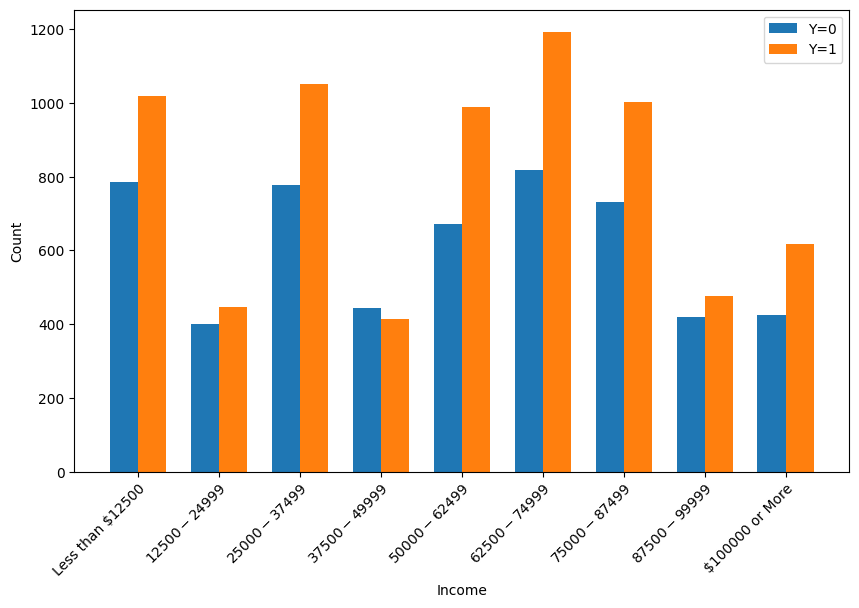

In [ ]:
# Ploting the accepted coupon and not-accepted based on income criteria
fig_income, axes_income = plt.subplots( figsize=(10, 6) )

bar_width = 0.35
index = np.arange(len(incomes))

bars_y0 = axes_income.bar(index, zero_counts.values(), bar_width, label='Y=0')
bars_y1 = axes_income.bar(index + bar_width, one_counts.values(), bar_width, label='Y=1')

axes_income.set_xlabel('Income')
axes_income.set_ylabel('Count')
axes_income.set_xticks(index+bar_width/2)
axes_income.set_xticklabels(incomes, rotation=45, ha='right', rotation_mode='anchor')
axes_income.legend()

plt.show()

Text(0, 0.5, 'Ratios')

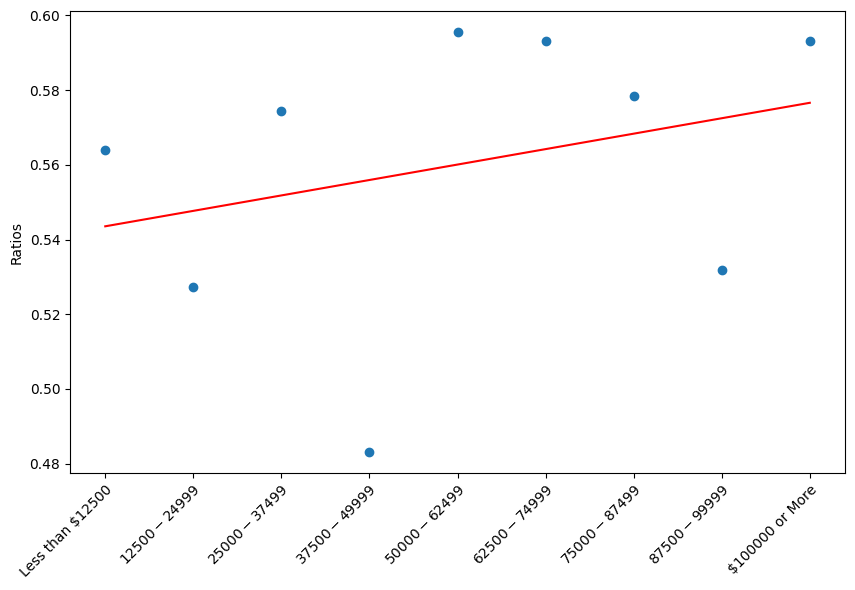

In [ ]:
# Clearly there is no relation since the horizontal line is a good candidate to approximating the behaviour
income_ratios = []
list_ones = list(one_counts.values())
list_zeros = list(zero_counts.values())
for i in range(len(list_ones)):
    ratio = list_ones[i] / ( list_ones[i] + list_zeros[i] )
    income_ratios.append( ratio )
fig_ratios, axes_ratios = plt.subplots( figsize=(10, 6) )
xticks = np.arange(len(income_ratios))
model = LinearRegression()
y_data = np.array( income_ratios )
x_data = np.array( xticks ).reshape(-1, 1) # reshape for LinearRegression()
model.fit(x_data, y_data)
y_pred = model.predict(x_data)
axes_ratios.plot(xticks, y_pred, color='red')

axes_ratios.scatter( xticks, income_ratios )

axes_ratios.set_xticks(xticks)
axes_ratios.set_xticklabels(incomes, rotation=45, ha='right', rotation_mode='anchor')
axes_ratios.set_ylabel("Ratios")


Even though the line presented above, clearly suggests that there is a relation between acceptance of the coupon and income in a way that, the more you earn the more likely you will accept the coupon. But we can see that there is a large variance, our dataset consists of 9 possible values and the '37500-49999' attribute clearly is an outlier. So as this is a inconsistent analysis, we opted to use a One Hot Encoder for the income attribute.

In [ ]:
# Creating a one_hot_encoder for income in the final Matrix.
one_hot_encoder_income = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_incomeTransform = one_hot_encoder_income.fit_transform(X[['income']])
X_final = pd.concat( [X, one_hot_encoder_incomeTransform], axis=1 ).drop( columns= ['income'] )
#X_final

# Deciding for some variables that are kind of trivial to define its categorical behaviour
---
## Destination
As we can clearly see there is no hierarquy between the attribute **destination**. So we can already assume that we will use them as a One Hot Encoder in the final Matrix.

Notice that this attribute may be essential to define the acceptence of the coupon, since the activity the costumer is going to do is deterministic to accepting the coupon.


In [ ]:
# As we can see, there is no worries to handle with unknown data...
np.unique( X['destination'] )

array(['Home', 'No Urgent Place', 'Work'], dtype=object)

In [ ]:
one_hot_encoder_destination = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_destinationTransform = one_hot_encoder_destination.fit_transform(X[['destination']])
X_final = pd.concat( [X_final, one_hot_encoder_destinationTransform], axis=1 ).drop( columns=['destination'])

---
## Passanger
The **passanger** attribute can be seen as the **destination** attribute. Since it can be viewed as some essential data for deciding the coupon acceptence.

In [ ]:
# As we can see, there are no unknows.
np.unique( X['passanger'] )

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [ ]:
one_hot_encoder_passanger = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_passangerTransform = one_hot_encoder_passanger.fit_transform(X[['passanger']])
X_final = pd.concat( [X_final, one_hot_encoder_passangerTransform], axis=1 ).drop( columns=['passanger'] )

---
## Weather
The **weather** attribute has no hierarquy. So i will use a One Hot Encoder to discretize the variables.

In [ ]:
# No unknow data...
np.unique(X['weather'])

array(['Rainy', 'Snowy', 'Sunny'], dtype=object)

In [ ]:
one_hot_encoder_weather = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_weatherTransform = one_hot_encoder_weather.fit_transform(X[['weather']])
X_final = pd.concat( [X_final, one_hot_encoder_weatherTransform], axis=1 ).drop(columns=['weather'])

---
## Temperature
Temperature can be viewed as an attribute that says if it is hot, neutral or cold outside. So there is no apparently hierarquy between those variables, so i'm going to use the One Hot Encoder to it  as well

In [ ]:
one_hot_encoder_temperature = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_temperatureTransform = one_hot_encoder_temperature.fit_transform(X[['temperature']])
X_final = pd.concat( [X_final, one_hot_encoder_temperatureTransform], axis=1 ).drop(columns=['temperature'])

---
## Time
Time don't have a clearly hierarquy relation, so i will use a One Hot Encoder.

In [ ]:
# No missing values.
np.unique( X['time'] )

array(['10AM', '10PM', '2PM', '6PM', '7AM'], dtype=object)

In [ ]:
one_hot_encoder_time = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_timeTransform = one_hot_encoder_time.fit_transform(X[['time']])
X_final = pd.concat( [X_final, one_hot_encoder_timeTransform], axis=1 ).drop(columns=['time'])

---
## Coupon
Coupon does't have a imbued hierarquy.

In [ ]:
# No missing values
np.unique( X['coupon'] )

array(['Bar', 'Carry out & Take away', 'Coffee House',
       'Restaurant(20-50)', 'Restaurant(<20)'], dtype=object)

In [ ]:
one_hot_encoder_coupon = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_couponTransform = one_hot_encoder_coupon.fit_transform(X[['coupon']])
X_final = pd.concat( [X_final, one_hot_encoder_couponTransform], axis=1 ).drop(columns=['coupon'])

---
## Expiration
There is no clearly hierarquy in the expiration. So we will use a One Hot encoder

In [ ]:
# No missing values
np.unique( X['expiration'] )

array(['1d', '2h'], dtype=object)

In [ ]:
one_hot_encoder_expiration = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_expirationTransform = one_hot_encoder_expiration.fit_transform(X[['expiration']])
X_final = pd.concat( [X_final, one_hot_encoder_expirationTransform], axis=1 ).drop(columns=['expiration'])

---
## Gender
gender attribute has no hierarquy. So i will use One Hot Encoder

In [ ]:
# No missing values
np.unique( X['gender'] )

array(['Female', 'Male'], dtype=object)

In [ ]:
one_hot_encoder_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_genderTransform = one_hot_encoder_gender.fit_transform(X[['gender']])
X_final = pd.concat( [X_final, one_hot_encoder_genderTransform], axis=1 ).drop(columns=['gender'])

---
## Age
Age has some kind of a hierarquy if you can say. But for the sake of the analysis, i want to divide into multiple binary attributes. Since this way i can make a KNN with more compatible entries. What i'm trying to say is that **age** is an attribute that can see the likeliness of some data being more relatable with another data.

In [ ]:
# No missing values
np.unique(X['age'])

array(['21', '26', '31', '36', '41', '46', '50plus', 'below21'],
      dtype=object)

In [ ]:
one_hot_encoder_age = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_ageTransform = one_hot_encoder_age.fit_transform(X[['age']])
X_final = pd.concat( [X_final, one_hot_encoder_ageTransform], axis=1 ).drop(columns=['age'])

---
## maritalStatus
no clear hierarquy between those variables.

In [ ]:
one_hot_encoder_maritalStatus = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_maritalStatusTransform = one_hot_encoder_maritalStatus.fit_transform(X[['maritalStatus']])
X_final = pd.concat( [X_final, one_hot_encoder_maritalStatusTransform], axis=1 ).drop(columns=['maritalStatus'])

---
## Ocupation
Ocupation has no Ordinal values between them. So we will use a One Hot Encoder

In [ ]:
one_hot_encoder_occupation = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoder_occupationTransform = one_hot_encoder_occupation.fit_transform(X[['occupation']])
X_final = pd.concat( [X_final, one_hot_encoder_occupationTransform], axis=1 ).drop(columns=['occupation'])

---
## hasChildren
attribute **hasChildren** is already discretized! So we will only test if there is no missing data

In [ ]:
# No missing Data and already discretized!
np.unique( X['has_children'] )

array([0, 1])

---
## Education
Education has some kind of a hierarquy. So we will need to strive a little bit more to define if we will use a One Hot Encoder or a Ordinal Encoder. The basical question that i want to answer to define one of the two Encoder's is: There is a relation between education and acceptance of the coupon?

In [ ]:
# Since the is clealy a graduated system that has this 'educationOrder'
educationOrder = ['Some High School', 'High School Graduate', 'Some college - no degree',
                  'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
encoderEducation = OrdinalEncoder(categories=[educationOrder])
X_testEducation = encoderEducation.fit_transform(X[['education']])
len(X_testEducation)

12684

In [ ]:
zero_counts_education = { education: 0 for education in educationOrder }
one_counts_education = { education: 0 for education in educationOrder }

for education, _y in zip( X['education'], y ):
    if _y == 0:
        zero_counts_education[education] += 1
    else:
        one_counts_education[education] += 1

print(zero_counts_education)
print(one_counts_education)

{'Some High School': 25, 'High School Graduate': 369, 'Some college - no degree': 1756, 'Associates degree': 515, 'Bachelors degree': 1932, 'Graduate degree (Masters or Doctorate)': 877}
{'Some High School': 63, 'High School Graduate': 536, 'Some college - no degree': 2595, 'Associates degree': 638, 'Bachelors degree': 2403, 'Graduate degree (Masters or Doctorate)': 975}


In [ ]:
# Test if all data was used
test = 0
for key, values in zero_counts_education.items():
    test += values
for key, values in one_counts_education.items():
    test += values
print(test)
# 12684 is the number of n (data samples)

12684


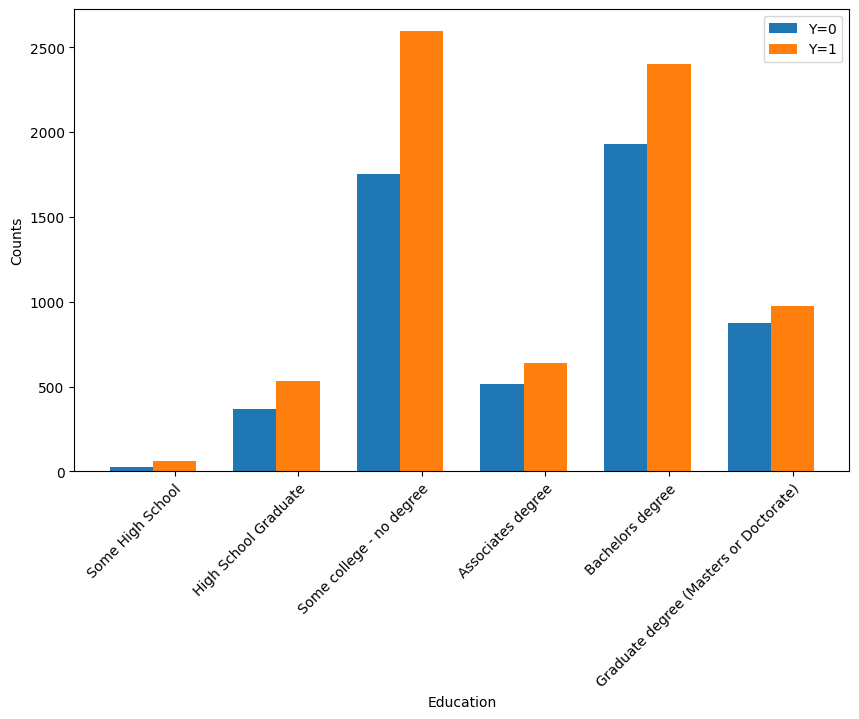

In [ ]:
fig_education, axes_education = plt.subplots( figsize=(10, 6) )

bar_width = 0.35
x_ticks = np.arange( len(educationOrder) )

bars_y0_education = axes_education.bar( x_ticks, zero_counts_education.values(), bar_width, label='Y=0' )
bars_y1_education = axes_education.bar( x_ticks + bar_width, one_counts_education.values(), bar_width, label='Y=1' )

axes_education.set_xlabel('Education')
axes_education.set_ylabel('Counts')
axes_education.set_xticks( x_ticks + bar_width)
axes_education.set_xticklabels(educationOrder, rotation=45, ha='right', rotation_mode='anchor')
axes_education.legend()

plt.show()

In [ ]:
education_ratios = []
one_counts_educationValues = list(one_counts_education.values())
zero_counts_educationValues = list(zero_counts_education.values())
for i in range(len(one_counts_educationValues)):
    ratio = (one_counts_educationValues[i]) / (one_counts_educationValues[i] + zero_counts_educationValues[i])
    education_ratios.append(ratio)
education_ratios

[0.7159090909090909,
 0.5922651933701657,
 0.5964146173293495,
 0.5533391153512576,
 0.554325259515571,
 0.5264578833693304]

Text(0, 0.5, 'Ratios')

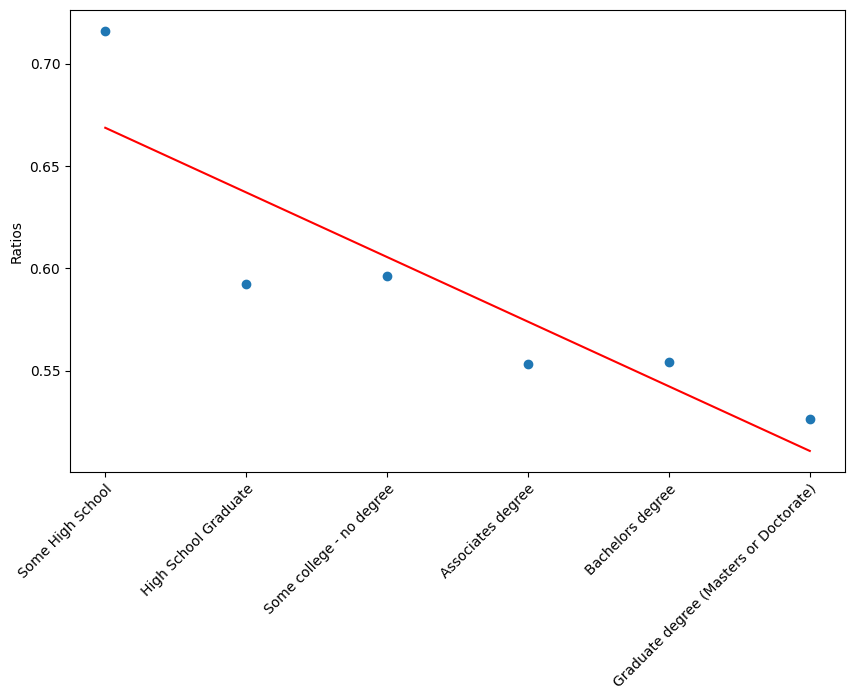

In [ ]:
fig_ratios, axes_ratios = plt.subplots( figsize=(10, 6) )
xticks = np.arange(len(educationOrder))
axes_ratios.scatter( xticks, education_ratios )
model = LinearRegression()
y_data = np.array(education_ratios)
x_data = np.array(xticks).reshape(-1, 1)
model.fit( x_data, y_data )
y_pred = model.predict(x_data)
axes_ratios.plot(xticks, y_pred, color='red')

axes_ratios.set_xticks(xticks)
axes_ratios.set_xticklabels(educationOrder, rotation=45, ha='right', rotation_mode='anchor')
axes_ratios.set_ylabel("Ratios")

As we can see with the above scatter, we can infere on our data that as education 'increases' than the ratio of acceptance of the coupon will decrease. So using an Ordinal Encoder can be better than using a One Hot Encoder - It can be tested. As you can see there is less variance than the income attribute (even though the 'Some High School' is a little bit off). But the slope of the line in the 'education' attribute is ten times greater than the 'income' attribute. Suggesting that there is a more concise relation here.

In [ ]:
# Adding the 'education' Ordinal Encoded Column to the main dataFrame!
X_final.drop(columns=['education'])
X_final['education'] = X_testEducation
#X_final

In [ ]:
# car attribute is not in the jupyter notebook so i will drop it
X_final = X_final.drop(columns=['car'])
X_final

,has_children,education,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,...,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,1,2.0,never,never,NaN,4~8,1~3,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,2.0,never,never,NaN,4~8,1~3,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2.0,never,never,NaN,4~8,1~3,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2.0,never,never,NaN,4~8,1~3,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2.0,never,never,NaN,4~8,1~3,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,4.0,never,never,1~3,4~8,1~3,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12680,0,4.0,never,never,1~3,4~8,1~3,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12681,0,4.0,never,never,1~3,4~8,1~3,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12682,0,4.0,never,never,1~3,4~8,1~3,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---
## Testing the already done preprocessing

In [ ]:
# All the data already preprocessed it numerical, so we can work with it
X_testing_preprocessing = X_final.copy()
X_testing_preprocessing = X_testing_preprocessing.drop(columns=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
X_testing_preprocessing

pd.set_option('display.max_rows', None)
print(X_testing_preprocessing.dtypes)
pd.reset_option('display.max_rows')

has_children                                              int64
education                                               float64
toCoupon_GEQ5min                                          int64
toCoupon_GEQ15min                                         int64
toCoupon_GEQ25min                                         int64
direction_same                                            int64
direction_opp                                             int64
income_0.0                                              float64
income_1.0                                              float64
income_2.0                                              float64
income_3.0                                              float64
income_4.0                                              float64
income_5.0                                              float64
income_6.0                                              float64
income_7.0                                              float64
income_8.0                              

In [ ]:
mutual_info_scores = mutual_info_classif(X_testing_preprocessing, y)
mutual_info_scores

array([2.31824954e-03, 6.86426823e-03, 4.32111963e-04, 1.46108671e-03,
       9.68675048e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.07988221e-03, 0.00000000e+00, 0.00000000e+00, 3.65505920e-03,
       1.73698732e-03, 0.00000000e+00, 3.50548593e-04, 0.00000000e+00,
       1.54582958e-05, 5.91377535e-03, 0.00000000e+00, 1.41418518e-02,
       2.15334606e-03, 1.33549006e-03, 6.50956658e-04, 5.03405821e-03,
       2.72117051e-03, 0.00000000e+00, 5.18439688e-04, 9.73074232e-03,
       9.05851020e-03, 5.23047090e-03, 1.13123186e-03, 2.76029884e-03,
       7.14226285e-03, 5.33604667e-03, 1.86119950e-02, 1.30372946e-02,
       7.38537280e-03, 3.93178764e-03, 3.66450546e-03, 1.33260350e-02,
       7.31503849e-03, 7.21753263e-03, 0.00000000e+00, 6.93171510e-04,
       0.00000000e+00, 3.16219500e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.83875547e-04, 4.60735244e-04, 0.00000000e+00,
       0.00000000e+00, 7.88619581e-03, 6.84793404e-04, 0.00000000e+00,
      

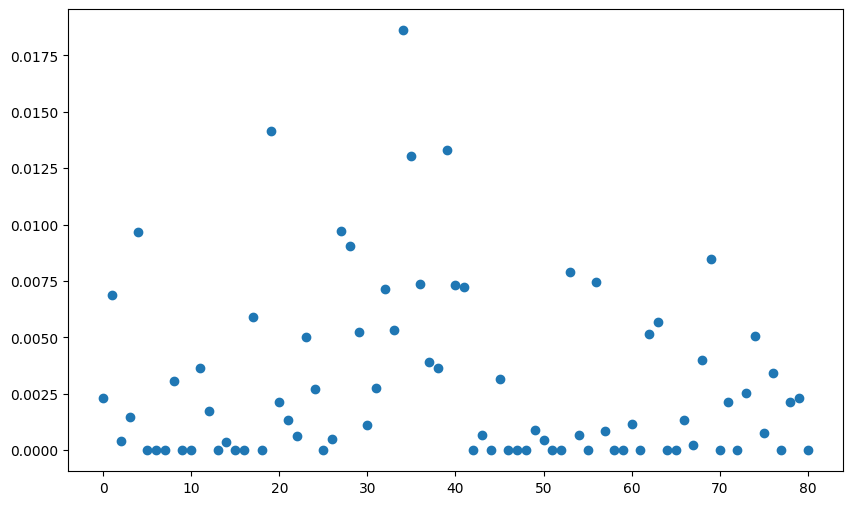

In [ ]:
# Printing the mutual_info_scores
mutual_info_scores_list = list(mutual_info_scores)
xticks_mutual_info = np.arange( len(mutual_info_scores_list) )

fig, axes = plt.subplots( figsize = (10, 6) )
axes.scatter(xticks_mutual_info, mutual_info_scores_list)

In [ ]:
# 10 most 'relevant' features
feature_scores = dict(zip(X_testing_preprocessing.columns, mutual_info_scores_list))
sorted_feature_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_feature_scores[:20]:
    print(f'{feature}: {score}')

coupon_Bar: 0.018611994968148915
passanger_Alone: 0.014141851824376106
expiration_1d: 0.013326034954866506
coupon_Carry out & Take away: 0.013037294584280934
temperature_55: 0.009730742318454277
toCoupon_GEQ25min: 0.009686750477886585
temperature_80: 0.009058510200706804
occupation_Legal: 0.008491672740386091
maritalStatus_Single: 0.007886195808972207
occupation_Architecture & Engineering: 0.007466848315994534
coupon_Coffee House: 0.007385372798002887
expiration_2h: 0.007315038491106707
gender_Female: 0.007217532629273382
time_6PM: 0.007142262853888859
education: 0.006864268226308257
destination_No Urgent Place: 0.005913775350364414
occupation_Education&Training&Library: 0.0056649140893887395
time_7AM: 0.00533604667370291
time_10AM: 0.005230470897922723
occupation_Construction & Extraction: 0.005145265768014218


In [ ]:
mean_score = sum(list(feature_scores.values())) / len(list(feature_scores))
print(mean_score)

0.003005588184567859


In [ ]:
# Features above mean_value
for feature, score in sorted_feature_scores:
    if score >= mean_score:
        print(f'{feature}: {score}')

coupon_Bar: 0.018611994968148915
passanger_Alone: 0.014141851824376106
expiration_1d: 0.013326034954866506
coupon_Carry out & Take away: 0.013037294584280934
temperature_55: 0.009730742318454277
toCoupon_GEQ25min: 0.009686750477886585
temperature_80: 0.009058510200706804
occupation_Legal: 0.008491672740386091
maritalStatus_Single: 0.007886195808972207
occupation_Architecture & Engineering: 0.007466848315994534
coupon_Coffee House: 0.007385372798002887
expiration_2h: 0.007315038491106707
gender_Female: 0.007217532629273382
time_6PM: 0.007142262853888859
education: 0.006864268226308257
destination_No Urgent Place: 0.005913775350364414
occupation_Education&Training&Library: 0.0056649140893887395
time_7AM: 0.00533604667370291
time_10AM: 0.005230470897922723
occupation_Construction & Extraction: 0.005145265768014218
occupation_Production Occupations: 0.005059720704258863
weather_Rainy: 0.005034058207042946
occupation_Installation Maintenance & Repair: 0.003978749521104552
coupon_Restaurant(

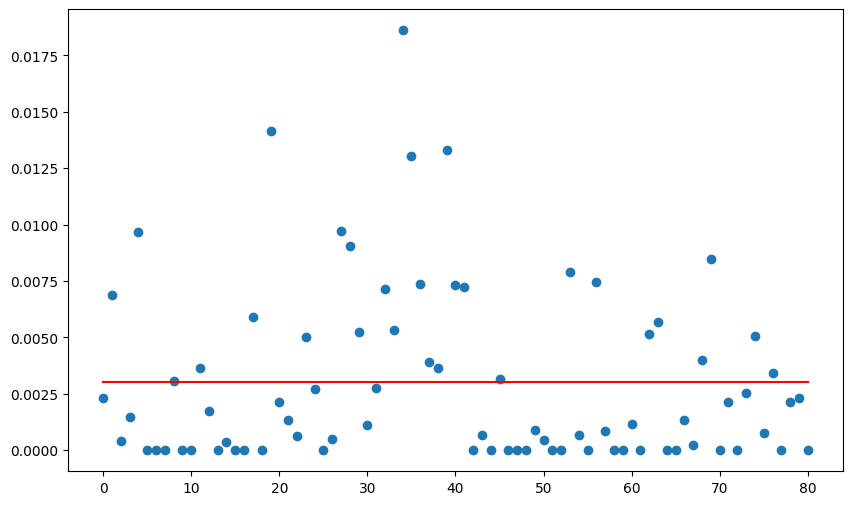

In [ ]:
y_line = []
for i in range(len(xticks_mutual_info)):
    y_line.append(mean_score)
axes.plot(xticks_mutual_info, y_line, color='red')

fig

---
## Dealing with missing Data!

In [ ]:
X_testing = X_final.copy()
X_testing_mean = X_final.copy()
X_testing_median = X_final.copy()
X_testing_random = X_final.copy()

In [ ]:
# I'm using a Brute-Force Ordinal Encoder, since there is hierarquy in the
# quantity of number of times you go to a bar.

# Dealing with Bar
X_testing = X_final.copy()
X_testing_mean = X_final.copy()
X_testing_median = X_final.copy()
X_testing_random = X_final.copy()

def insertingElementMultipleArray( x : int ):
    X_values_insertingMean.append(x)
    X_values_insertingMedian.append(x)
    X_values_insertingRandom.append(x)

X_values = []
for i in X_testing['Bar']:
    if( i == 'never' ):
        X_values.append(0)
    if( i == 'less1' ):
        X_values.append(0)
    if( i == '1~3' ):
        X_values.append(1)
    if( i == '4~8' ):
        X_values.append(2)
    if( i == 'gt8' ):
        X_values.append(3)

meanBar = sum( X_values ) / len( X_values )

X_values_sorted = sorted( X_values )
medianBar = np.median(np.array(X_values_sorted))

X_values_insertingMean = []
X_values_insertingMedian = []
X_values_insertingRandom = []
for element in X_testing['Bar']:
    if( element == 'never' or element == 'less1' ):
        insertingElementMultipleArray(0)
    elif( element == '1~3' ):
        insertingElementMultipleArray(1)
    elif( element == '4~8' ):
        insertingElementMultipleArray(2)
    elif( element == 'gt8'):
        insertingElementMultipleArray(3)
    else:
        X_values_insertingMean.append(meanBar)
        X_values_insertingMedian.append(medianBar)
        X_values_insertingRandom.append(random.randint(0, 3))

X_testing_mean = X_testing_mean.drop(columns=['Bar'])
X_testing_median = X_testing_median.drop(columns=['Bar'])
X_testing_random = X_testing_random.drop(columns=['Bar'])

X_testing_mean = pd.concat( [X_testing_mean, pd.DataFrame({'Bar': X_values_insertingMean})], axis= 1 )
X_testing_median = pd.concat( [X_testing_median, pd.DataFrame({'Bar': X_values_insertingMedian})], axis= 1 )
X_testing_random = pd.concat( [X_testing_random, pd.DataFrame({'Bar': X_values_insertingRandom})], axis= 1)


In [ ]:
# Carry Away BruteForcing
X_values = []
for element in X_testing['CarryAway']:
    if element == 'never' or element == 'less1':
        X_values.append(0)
    elif element == '1~3':
        X_values.append(1)
    elif element == '4~8':
        X_values.append(2)
    elif element == 'gt8':
        X_values.append(3)

meanCarryAway = sum(X_values) / len(X_values)

X_values_sorted = sorted(X_values)
medianCarryAway = np.median(np.array(X_values_sorted))

X_values_insertingMean = []
X_values_insertingMedian = []
X_values_insertingRandom = []
for element in X_testing['CarryAway']:
    if( element == 'never' or element == 'less1' ):
        insertingElementMultipleArray(0)
    elif( element == '1~3' ):
        insertingElementMultipleArray(1)
    elif( element == '4~8' ):
        insertingElementMultipleArray(2)
    elif( element == 'gt8'):
        insertingElementMultipleArray(3)
    else:
        X_values_insertingMean.append(meanCarryAway)
        X_values_insertingMedian.append(medianCarryAway)
        X_values_insertingRandom.append(random.randint(0, 3))

X_testing_mean = X_testing_mean.drop(columns=['CarryAway'])
X_testing_median = X_testing_median.drop(columns=['CarryAway'])
X_testing_random = X_testing_random.drop(columns=['CarryAway'])

X_testing_mean = pd.concat( [X_testing_mean, pd.DataFrame({'CarryAway': X_values_insertingMean})], axis= 1 )
X_testing_median = pd.concat( [X_testing_median, pd.DataFrame({'CarryAway': X_values_insertingMedian})], axis= 1 )
X_testing_random = pd.concat( [X_testing_random, pd.DataFrame({'CarryAway': X_values_insertingRandom})], axis= 1)


In [ ]:
# Dealing with RestaurantLessThan20
X_values = []
for element in X_testing['RestaurantLessThan20']:
    if element == 'never' or element == 'less1':
        X_values.append(0)
    elif element == '1~3':
        X_values.append(1)
    elif element == '4~8':
        X_values.append(2)
    elif element == 'gt8':
        X_values.append(3)

meanRestaurantLessThan20 = sum(X_values) / len(X_values)

X_values_sorted = sorted(X_values)
medianmeanRestaurantLessThan20 = np.median(np.array(X_values_sorted))

X_values_insertingMean = []
X_values_insertingMedian = []
X_values_insertingRandom = []
for element in X_testing['RestaurantLessThan20']:
    if( element == 'never' or element == 'less1' ):
        insertingElementMultipleArray(0)
    elif( element == '1~3' ):
        insertingElementMultipleArray(1)
    elif( element == '4~8' ):
        insertingElementMultipleArray(2)
    elif( element == 'gt8'):
        insertingElementMultipleArray(3)
    else:
        X_values_insertingMean.append(meanRestaurantLessThan20)
        X_values_insertingMedian.append(medianmeanRestaurantLessThan20)
        X_values_insertingRandom.append(random.randint(0, 3))

X_testing_mean = X_testing_mean.drop(columns=['RestaurantLessThan20'])
X_testing_median = X_testing_median.drop(columns=['RestaurantLessThan20'])
X_testing_random = X_testing_random.drop(columns=['RestaurantLessThan20'])

X_testing_mean = pd.concat( [X_testing_mean, pd.DataFrame({'RestaurantLessThan20': X_values_insertingMean})], axis= 1 )
X_testing_median = pd.concat( [X_testing_median, pd.DataFrame({'RestaurantLessThan20': X_values_insertingMedian})], axis= 1 )
X_testing_random = pd.concat( [X_testing_random, pd.DataFrame({'RestaurantLessThan20': X_values_insertingRandom})], axis= 1)


In [ ]:
# Dealing with Restaurant20to50
X_values = []
for element in X_testing['Restaurant20To50']:
    if element == 'never' or element == 'less1':
        X_values.append(0)
    elif element == '1~3':
        X_values.append(1)
    elif element == '4~8':
        X_values.append(2)
    elif element == 'gt8':
        X_values.append(3)

meanRestaurantLessThan20 = sum(X_values) / len(X_values)

X_values_sorted = sorted(X_values)
medianmeanRestaurantLessThan20 = np.median(np.array(X_values_sorted))

X_values_insertingMean = []
X_values_insertingMedian = []
X_values_insertingRandom = []
for element in X_testing['Restaurant20To50']:
    if( element == 'never' or element == 'less1' ):
        insertingElementMultipleArray(0)
    elif( element == '1~3' ):
        insertingElementMultipleArray(1)
    elif( element == '4~8' ):
        insertingElementMultipleArray(2)
    elif( element == 'gt8'):
        insertingElementMultipleArray(3)
    else:
        X_values_insertingMean.append(meanRestaurantLessThan20)
        X_values_insertingMedian.append(medianmeanRestaurantLessThan20)
        X_values_insertingRandom.append(random.randint(0, 3))

X_testing_mean = X_testing_mean.drop(columns=['Restaurant20To50'])
X_testing_median = X_testing_median.drop(columns=['Restaurant20To50'])
X_testing_random = X_testing_random.drop(columns=['Restaurant20To50'])

X_testing_mean = pd.concat( [X_testing_mean, pd.DataFrame({'Restaurant20To50': X_values_insertingMean})], axis= 1 )
X_testing_median = pd.concat( [X_testing_median, pd.DataFrame({'Restaurant20To50': X_values_insertingMedian})], axis= 1 )
X_testing_random = pd.concat( [X_testing_random, pd.DataFrame({'Restaurant20To50': X_values_insertingRandom})], axis= 1)


In [ ]:
# Dealing with CoffeeHouse
X_values = []
for element in X_testing['CoffeeHouse']:
    if element == 'never' or element == 'less1':
        X_values.append(0)
    elif element == '1~3':
        X_values.append(1)
    elif element == '4~8':
        X_values.append(2)
    elif element == 'gt8':
        X_values.append(3)

meanRestaurantLessThan20 = sum(X_values) / len(X_values)

X_values_sorted = sorted(X_values)
medianmeanRestaurantLessThan20 = np.median(np.array(X_values_sorted))

X_values_insertingMean = []
X_values_insertingMedian = []
X_values_insertingRandom = []
for element in X_testing['CoffeeHouse']:
    if( element == 'never' or element == 'less1' ):
        insertingElementMultipleArray(0)
    elif( element == '1~3' ):
        insertingElementMultipleArray(1)
    elif( element == '4~8' ):
        insertingElementMultipleArray(2)
    elif( element == 'gt8'):
        insertingElementMultipleArray(3)
    else:
        X_values_insertingMean.append(meanRestaurantLessThan20)
        X_values_insertingMedian.append(medianmeanRestaurantLessThan20)
        X_values_insertingRandom.append(random.randint(0, 3))

X_testing_mean = X_testing_mean.drop(columns=['CoffeeHouse'])
X_testing_median = X_testing_median.drop(columns=['CoffeeHouse'])
X_testing_random = X_testing_random.drop(columns=['CoffeeHouse'])

X_testing_mean = pd.concat( [X_testing_mean, pd.DataFrame({'CoffeeHouse': X_values_insertingMean})], axis= 1 )
X_testing_median = pd.concat( [X_testing_median, pd.DataFrame({'CoffeeHouse': X_values_insertingMedian})], axis= 1 )
X_testing_random = pd.concat( [X_testing_random, pd.DataFrame({'CoffeeHouse': X_values_insertingRandom})], axis= 1)


---
# Using the Mean in the missing values

In [ ]:
# Spliting the Train and Test.
X_train, X_test, y_train, y_test = train_test_split(X_testing_mean, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Accuracy')

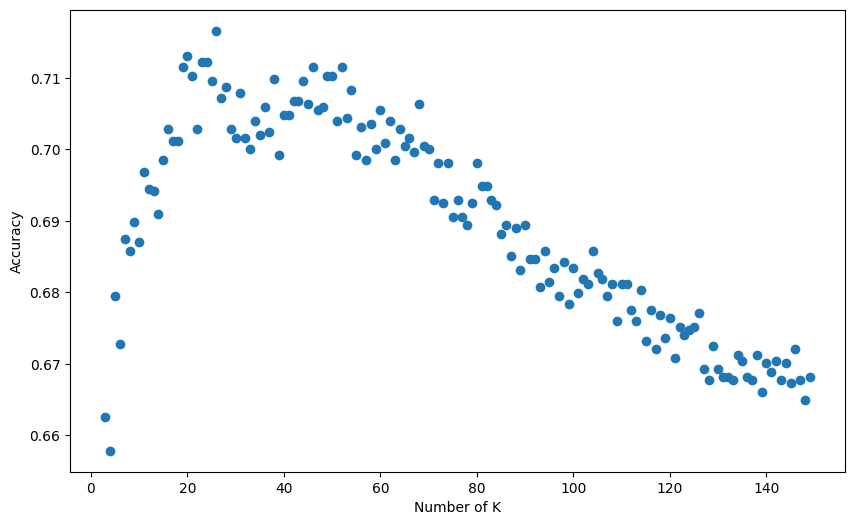

In [ ]:
## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 150):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

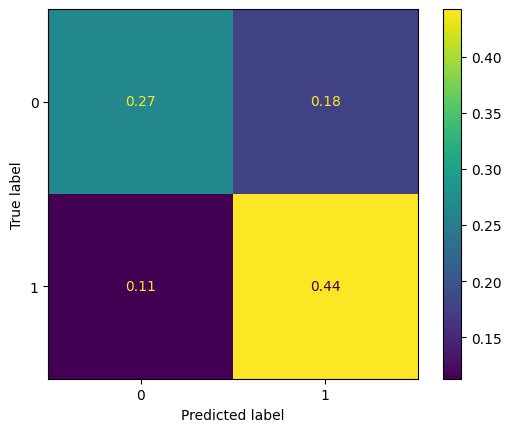

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 22
KNN = KNeighborsClassifier(n_neighbors=22)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

---
# Using the Median in the missing values

Text(0, 0.5, 'Accuracy')

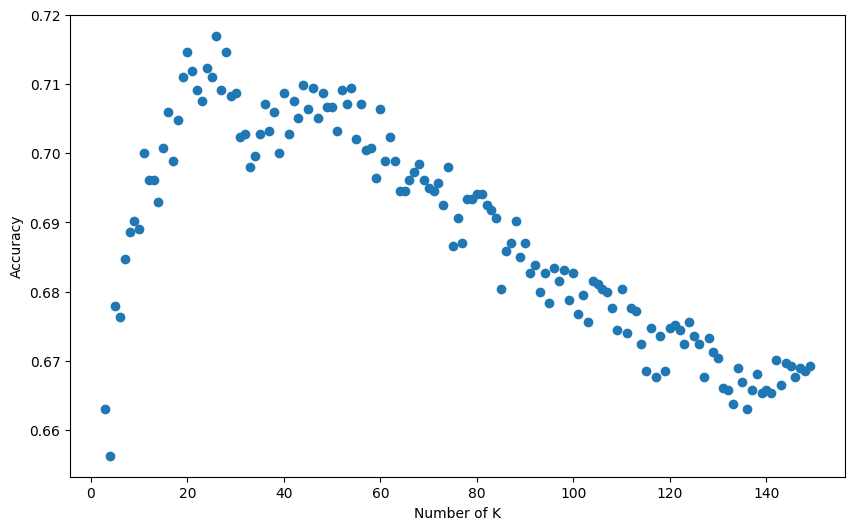

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_testing_median, y, test_size=0.2, random_state=42)

## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 150):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

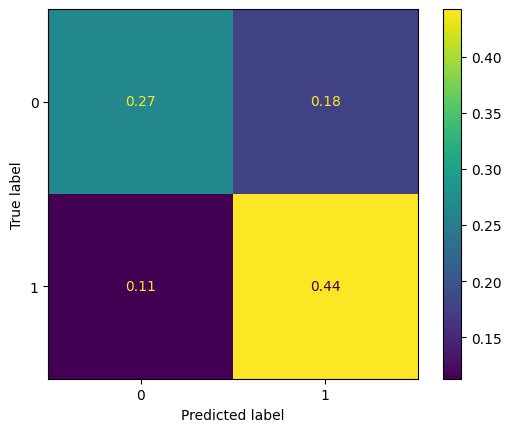

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 22
KNN = KNeighborsClassifier(n_neighbors=22)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

Text(0, 0.5, 'Accuracy')

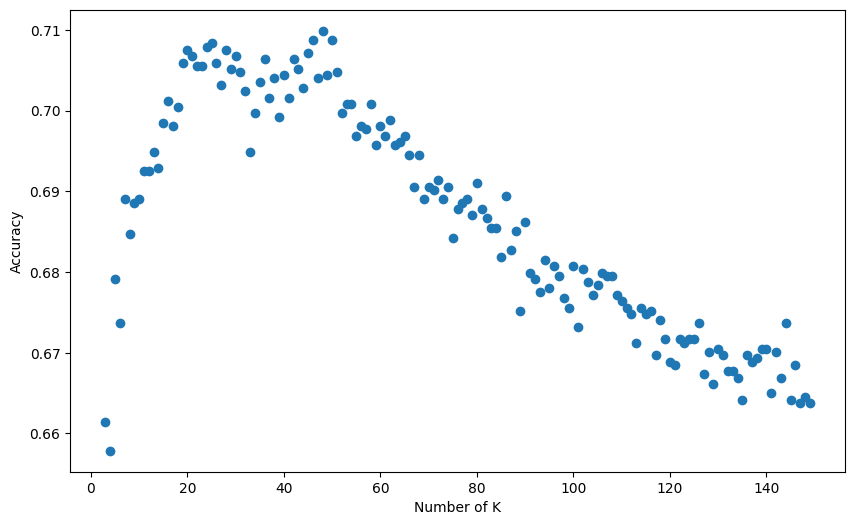

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_testing_random, y, test_size=0.2, random_state=42)

## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 150):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

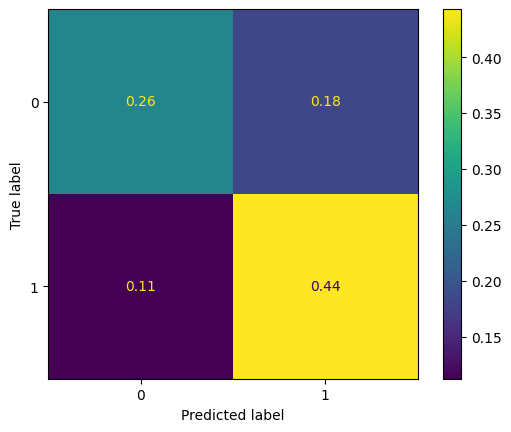

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 22
# Even though the is a spike at k 45-ish this don't represent a continuous
# incresing, so it might be better to not use it
KNN = KNeighborsClassifier(n_neighbors=22)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

Text(0, 0.5, 'Accuracy')

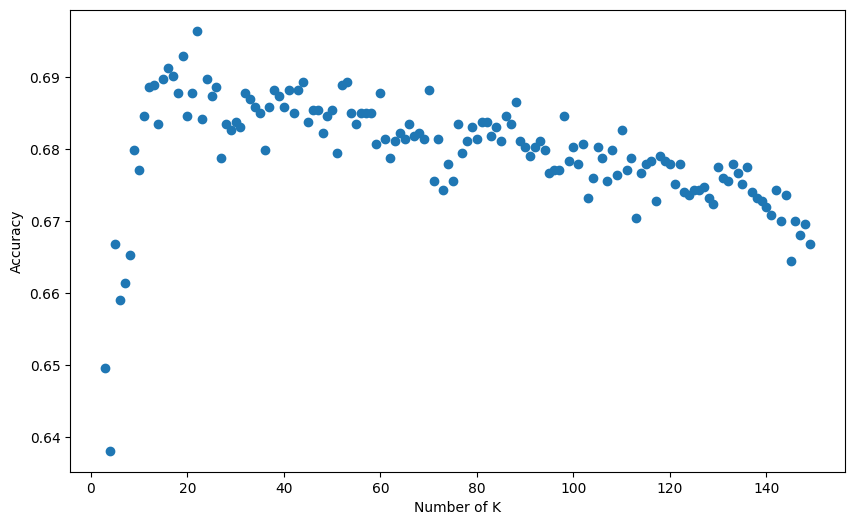

In [ ]:
# This test does not include the data that had missing values
## Testing the bias-variance tradeoff
X_testing_preprocessing_KNN = X_testing_preprocessing.copy()
y_testing_preprocessing_KNN = y.copy()
X_train, X_test, y_train, y_test = train_test_split(X_testing_preprocessing_KNN, y_testing_preprocessing_KNN, test_size=0.2, random_state=42)
y_accuracies = []
x_ticks = []
for k in range(3, 150):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

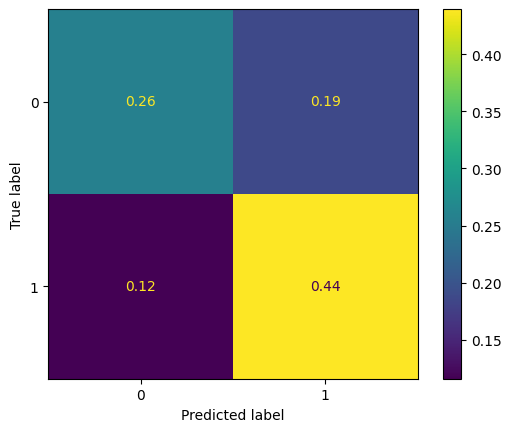

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=22)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

As we can see not including the missing values was incredibly a good estimator of the acceptance of the coupon. But we can see that adding the other variables that had missing values increased the score of our estimator by 1%, i.e., the 'random' and 'not including' the missing data had 0.26 + 0.44 = 0.70 adjusted data that was right. But the 'mean' and the 'median' could adjust 0.27 + 0.44 = 0.71 of the data right.

#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
-~Changing the missing values impacted in the mutual information of features with the target?~ => DO NOT ANSWER, there is no way to calculate Mutual Informations with missing values.

**Answer:**

We have tested each one of the criteria of substituing data. One of them was removing the attributes that had ambiguous data, three of them consisted of substituing NaN values with the mean, median and random state. We could see that there was no clear advantage by using more attributes to estimate our data. But we can see that adding this information added some value on our analysis, in the sense that it got right more data points on the testing data set



### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

In [ ]:
 # The codes for K-Nearest Neighbors Classifier's are above!

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

**Answer:**

We could say definetily that accuracy is a good metric for this problem, since the purpose of solving this problem is to define if the new customer will accept the coupon. But we think it's not the best one... As we can see, the Confusion Matrix can get us a better gasp of what is happening about our data, since we can see that predict the costumers that will accept is easier than predicting the ones that will not.

The best K encountered from this problem varies on the pre-processing of our data. But as we could see the K around 22 is the a almost-optimal solution for this problem. Choosing the K of our KNN is essential for the Bias-Variance tradeoff, since a smaller K will have a more variance, we can understand this increase of variance by choosing K = 1, since the new data depends on only one of the data it will havely be influenced by outliers and the boundaries of the problem will not be as continuous. And adding to it we would have a low-bias since the problem would suggest a high non-linear relation and with complex boundaries. As K increases the variance will decrease, since it will depend on more neighbors and will not rely on outliers, instead it will be more consistent will regions of specific classes. But the bias will decrease since the model will have a behaviour more like a linear regression.

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Seoul Bike Sharing Demand**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of the original dataset(`Rented Bike count`).<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum value of the known `Rented Bike count` in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
X = df.drop('Rented Bike Count', axis= 1)
y = df['Rented Bike Count']

In [ ]:
X_final = X.copy()

In [ ]:
# Pre-processing the data
def OneHotEnconder_specificColumns( X_final, name : str ):
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    one_hot_encoderTransform = one_hot_encoder.fit_transform(X[[name]])
    X_final = pd.concat( [X_final, one_hot_encoderTransform], axis= 1).drop(columns=[name])
    return X_final

In [ ]:
X_final = OneHotEnconder_specificColumns(X_final, 'Seasons')
X_final

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,No Holiday,1,1.0,0.0,0.0,0.0


In [ ]:
X_final = OneHotEnconder_specificColumns(X_final, 'Holiday')
X_final

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def SpecifyClass( max_item : int, numberOfClasses : int, number : float ) -> int:
    intervals = []
    for i in range(1, numberOfClasses + 1):
        intervals.append( i * max_item / numberOfClasses )
    class_number = 0
    for interval_range in intervals:
        if( number <= interval_range ):
            return class_number
        class_number += 1

def TransformToClasses( array, numberOfClasses : int ) -> np.array:
    if( numberOfClasses <= 2 or numberOfClasses >= 11 ):
        print("Not in the exercise boundaries")
        return
    arrayClasses = []
    max_item = max(array)
    for item in array:
        arrayClasses.append(SpecifyClass(max_item, numberOfClasses, item))
    return np.array(arrayClasses)

## Testing TransformToClasses
array = [1, 2, 3, 5, 6, 7]
arrayClass = TransformToClasses(array, numberOfClasses=7)
print(arrayClass)

[0 1 2 4 5 6]


In [ ]:
# Since that there is not much years to the dataset to visualize effects
# on weekend rented and so on i will use a week_day encoder.
week_days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday' ]
week_days_dataset = []
for date in X_final['Date']:
    date_str = str(date)
    day, month, year = map(int, date_str.split('/'))
    date = datetime.date(year, month, day)
    week_days_dataset.append(week_days[date.weekday()])
week_days_dataset = np.array( week_days_dataset )
week_days_dataset

array(['Friday', 'Friday', 'Friday', ..., 'Friday', 'Friday', 'Friday'],
      dtype='<U9')

In [ ]:
X_final = X_final.drop(columns=['Date'])
X_final = pd.concat( [X_final, pd.DataFrame({'Date' : week_days_dataset})], axis= 1 )


In [ ]:
# Didn't use function since function is fit_transforming from X not X_final
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
one_hot_encoderTransform = one_hot_encoder.fit_transform(X_final[['Date']])
X_final = pd.concat( [X_final, one_hot_encoderTransform], axis= 1).drop(columns=['Date'])

In [ ]:
y_withClasses = TransformToClasses(y, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_withClasses, test_size=0.2, random_state=42)

Text(0, 0.5, 'Accuracy')

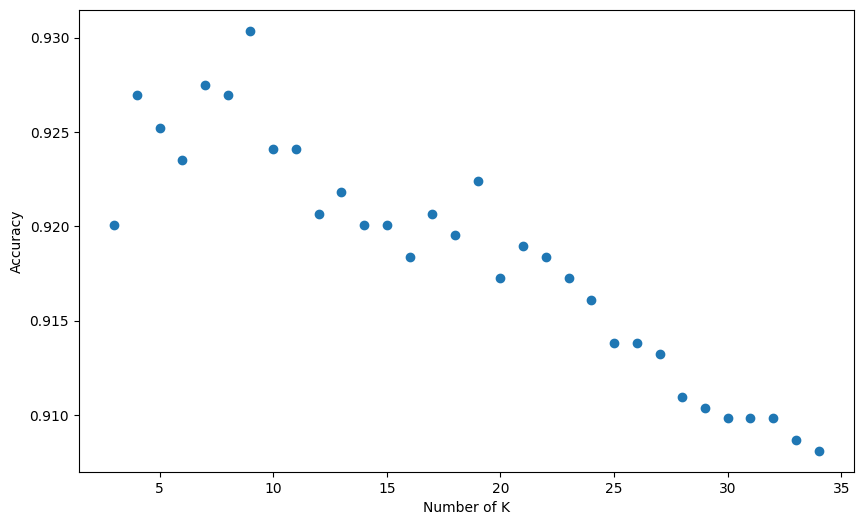

In [ ]:
## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 35):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

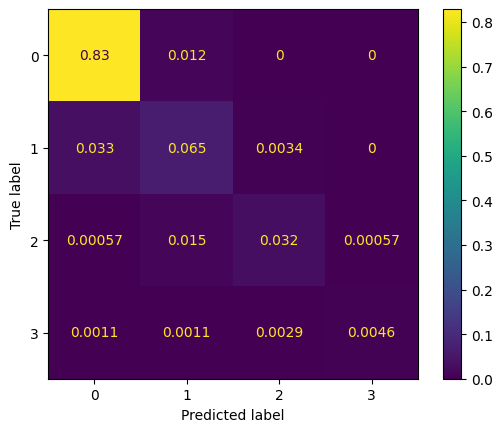

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 9
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

In [ ]:
# Testing for more Classes:
y_withClasses = TransformToClasses(y, 6)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_withClasses, test_size=0.2, random_state=42)

Text(0, 0.5, 'Accuracy')

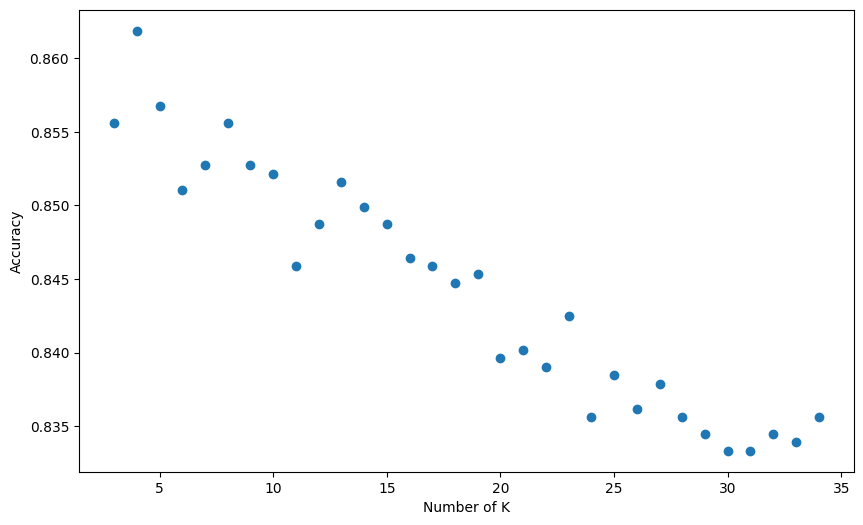

In [ ]:
## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 35):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

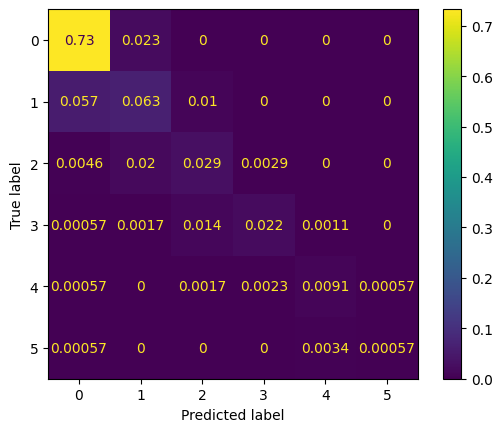

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 5
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot()
plt.show()

In [ ]:
# Testing for more Classes:
y_withClasses = TransformToClasses(y, 10)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_withClasses, test_size=0.2, random_state=42)

Text(0, 0.5, 'Accuracy')

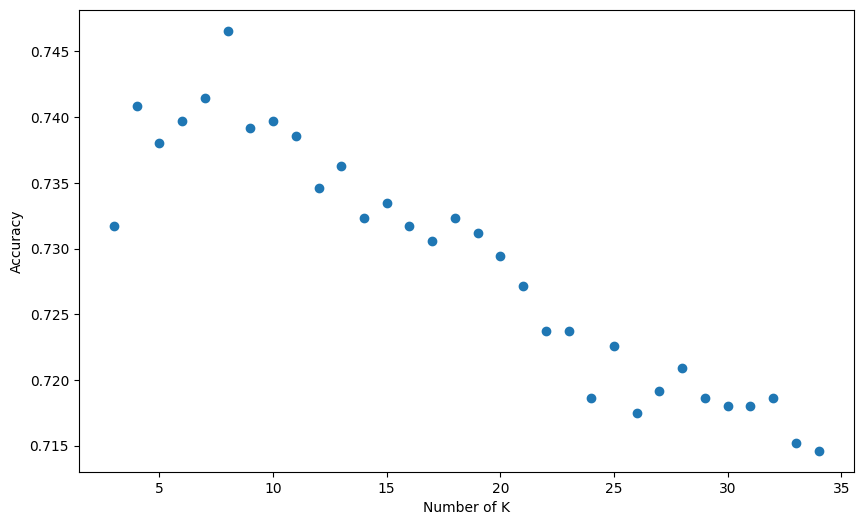

In [ ]:
## Testing the bias-variance tradeoff
y_accuracies = []
x_ticks = []
for k in range(3, 35):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_prime_test = KNN.predict(X_test)

    accuracy = accuracy_score(y_test, y_prime_test)
    y_accuracies.append(accuracy)
    x_ticks.append(k)

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(x_ticks, y_accuracies)
axes.set_xlabel('Number of K')
axes.set_ylabel('Accuracy')

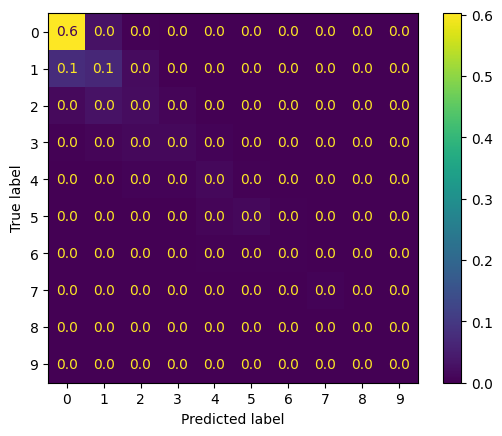

In [ ]:
# From the plot we can say that the almost-optimal solution is k ≃ 5
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_prime_test = KNN.predict(X_test)

confusion_matrix_X_testing = confusion_matrix(y_test, y_prime_test, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_X_testing)
disp.plot(values_format='.1f')


#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

**Answer**

Accuracy is not a good metric for this problem. As we can see by the score of the predictions, the methods could get right at least 70% of the data when the sub-optimal K was chosen. At the same time smaller K could generate more interpretability and more concise results, but increasing K affected negatively both of them. But even in the smallest K we get some misleading results.

We can spot thi misleading results by looking at the Confusion Matrix, as we can see most of the 0-class type were corrected predicted. But as we see the other class types we can see that most of them got corrected prediction in the same order as wrong prediction. So we can say that the Confusion Matrix was essential and the accuracy was not a good metric.

There is value in using a multiclass classification in a regression problem, since we could ask if a day is low, medium or high on rented bikes. But this is not so trivial to implement, as we can see the method was supossed to do that, but it could not achieve that.